**LOAD the Data**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

df=pd.read_csv(r"D:\VS Code Python Files\Sales Performance\online_retail_sales_dataset.csv")
df.head()


,transaction_id,timestamp,customer_id,product_id,product_category,quantity,price,discount,payment_method,customer_age,customer_gender,customer_location,total_amount
0,1,01-01-2023 00:00,1993,915,Home & Kitchen,8,103.30,0.23,Gift Card,27,Female,North America,636.33
1,2,01-01-2023 00:01,3474,553,Clothing,9,180.28,0.31,Gift Card,53,Other,South America,1119.54
2,3,01-01-2023 00:02,4564,248,Beauty & Personal Care,7,81.58,0.27,Debit Card,34,Other,North America,416.87
3,4,01-01-2023 00:03,1133,948,Clothing,3,235.20,0.00,Debit Card,50,Other,Australia,705.60
4,5,01-01-2023 00:04,3626,284,Books,9,453.00,0.34,Credit Card,23,Female,Australia,2690.82


In [2]:
df.tail()

,transaction_id,timestamp,customer_id,product_id,product_category,quantity,price,discount,payment_method,customer_age,customer_gender,customer_location,total_amount
998994,998995,24-11-2024 17:54,1431,886,Sports & Outdoors,7,244.18,0.18,Credit Card,54,Male,Africa,1401.59
998995,998996,24-11-2024 17:55,3096,553,Beauty & Personal Care,3,376.62,0.22,Gift Card,66,Female,South America,881.29
998996,998997,24-11-2024 17:56,2432,686,Beauty & Personal Care,7,9.02,0.03,PayPal,50,Male,Europe,61.25
998997,998998,24-11-2024 17:57,3291,406,Sports & Outdoors,3,117.31,0.00,Credit Card,63,Female,Australia,351.93
998998,998999,24-11-2024 17:58,1959,661,Sports & Outdoors,5,169.54,0.19,Credit Card,55,Other,North America,686.64


Data Cleaning & Processing

In [3]:
# Convert 'timestamp' to datetime with correct format
df["timestamp"] = pd.to_datetime(df["timestamp"], format="%d-%m-%Y %H:%M", errors="coerce")



In [4]:
# Check for missing values
print(df.isnull().sum())

transaction_id       0
timestamp            0
customer_id          0
product_id           0
product_category     0
quantity             0
price                0
discount             0
payment_method       0
customer_age         0
customer_gender      0
customer_location    0
total_amount         0
dtype: int64


** Create Key Performance Metrics
>>Total Sales
>> Average Order Value (AOV)
>> Sales by Category & Region

In [5]:
# Total Sales
total_sales = df['total_amount'].sum()

# Average Order Value
average_order_value = df['total_amount'].mean()

# Sales Aggregation
monthly_sales = df.groupby(df['timestamp'].dt.to_period('M')).agg({'total_amount': 'sum'}).reset_index()
category_sales = df.groupby('product_category')['total_amount'].sum().reset_index()
region_sales = df.groupby('customer_location')['total_amount'].sum()

# Print Metrics
print(f"Total Sales: ${total_sales}")
print(f"Average Order Value: ${average_order_value:.2f}")


Total Sales: $945901027.8800001
Average Order Value: $946.85


Sales Trend (Line Chart)



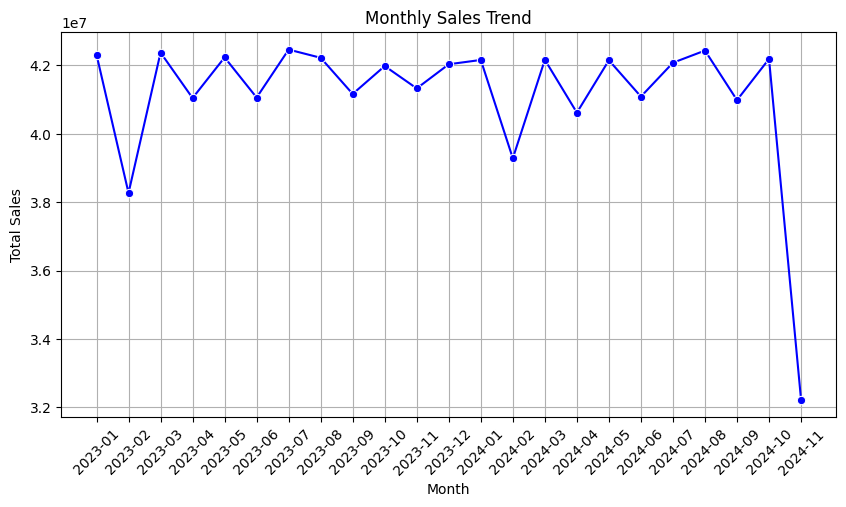

In [6]:
# Convert Period to String for plotting
monthly_sales['timestamp'] = monthly_sales['timestamp'].astype(str)

plt.figure(figsize=(10,5))
sns.lineplot(x=monthly_sales['timestamp'], y=monthly_sales['total_amount'], marker='o', color='blue')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


Sales by Category (Bar Chart)

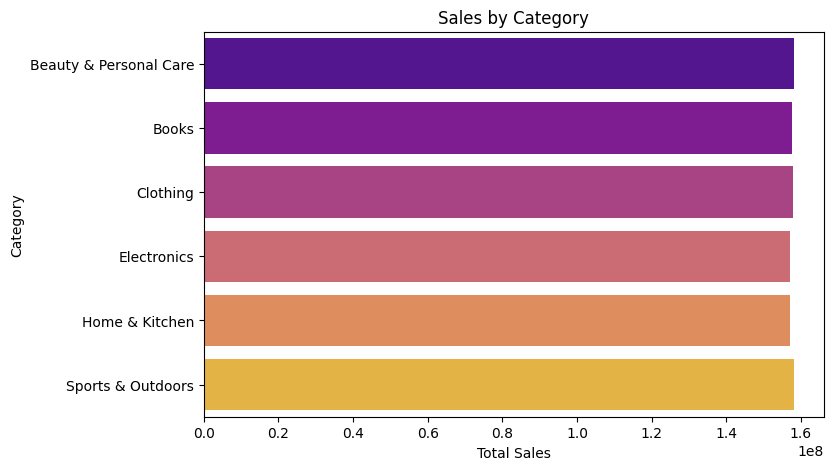

In [7]:
plt.figure(figsize=(8,5))
sns.barplot(x='total_amount', y='product_category', data=category_sales, palette='plasma')
plt.title("Sales by Category")
plt.xlabel("Total Sales")
plt.ylabel("Category")
plt.show()


Sales Distribution (Histogram)

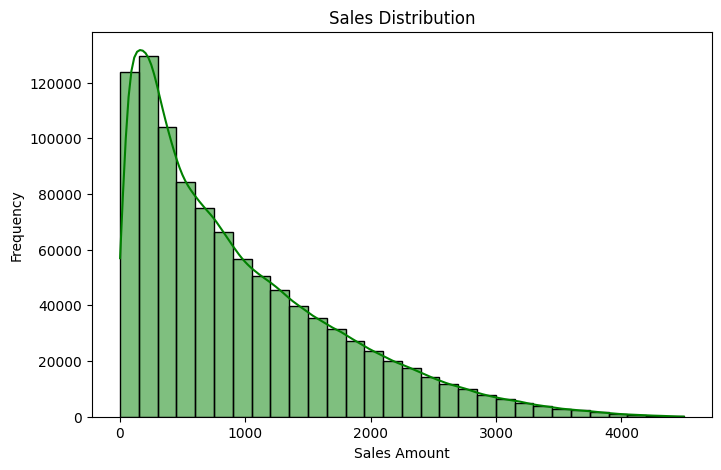

In [8]:
plt.figure(figsize=(8,5))
sns.histplot(df['total_amount'], bins=30, kde=True, color='green')
plt.title("Sales Distribution")
plt.xlabel("Sales Amount")
plt.ylabel("Frequency")
plt.show()


Region-wise Sales (Pie Chart)

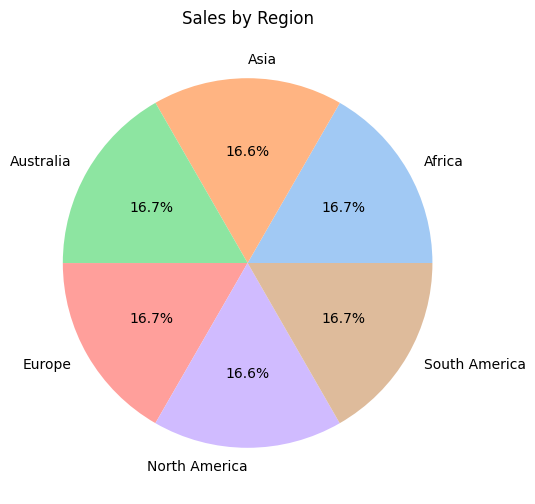

In [9]:
plt.figure(figsize=(6,6))
plt.pie(region_sales, labels=region_sales.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title("Sales by Region")
plt.show()


Arrange Visualisation into dashboard

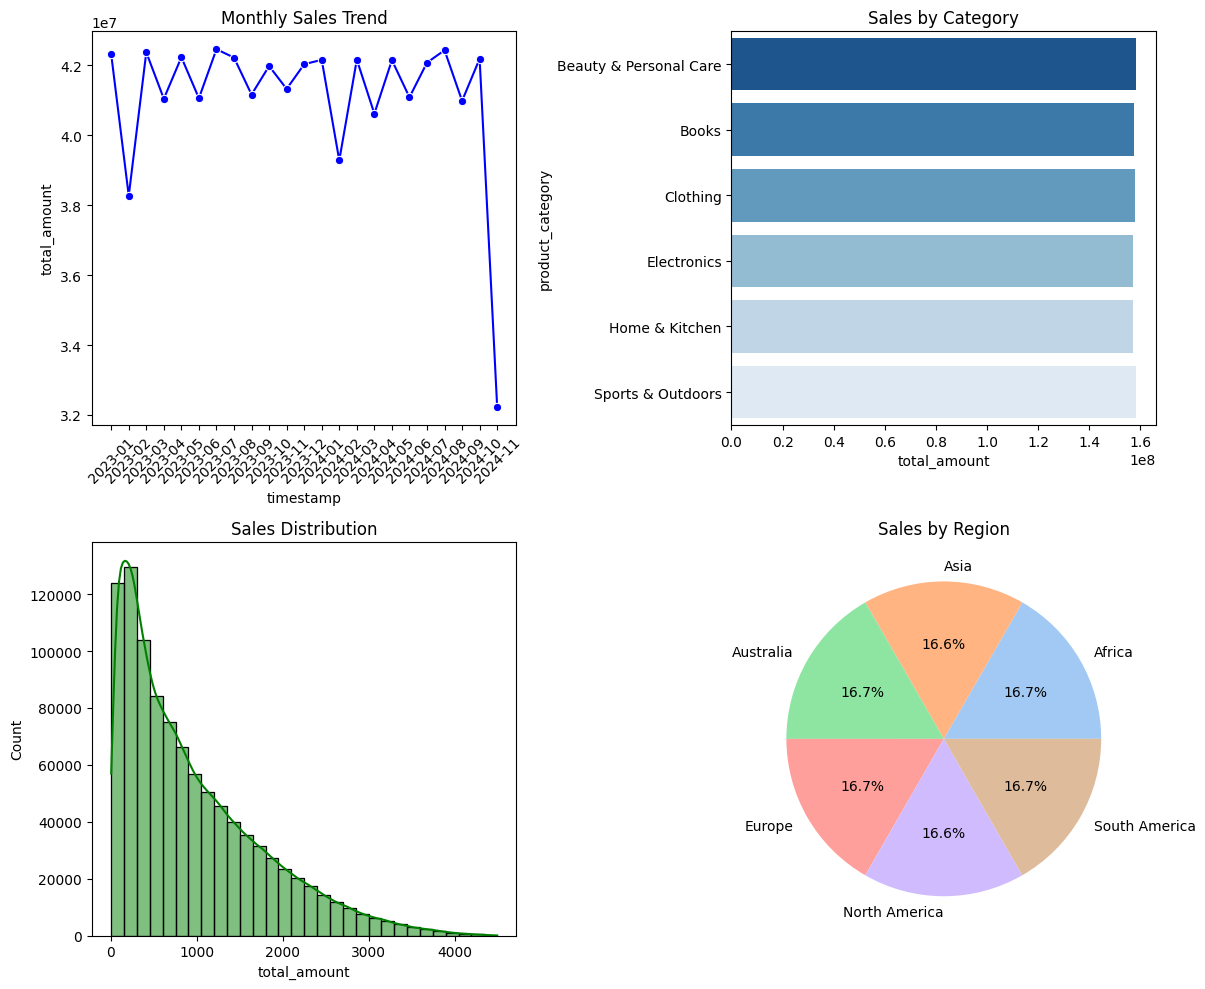

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Line Chart
sns.lineplot(x=monthly_sales['timestamp'], y=monthly_sales['total_amount'], marker='o', ax=axes[0, 0], color='blue')
axes[0, 0].set_title("Monthly Sales Trend")
axes[0, 0].tick_params(axis='x', rotation=45)

# Bar Chart
sns.barplot(x='total_amount', y='product_category', data=category_sales, palette='Blues_r', ax=axes[0, 1])
axes[0, 1].set_title("Sales by Category")

# Histogram
sns.histplot(df['total_amount'], bins=30, kde=True, color='green', ax=axes[1, 0])
axes[1, 0].set_title("Sales Distribution")

# Pie Chart
axes[1, 1].pie(region_sales, labels=region_sales.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
axes[1, 1].set_title("Sales by Region")

plt.tight_layout()
plt.show()


Here’s a quantified breakdown of the visualized data based on your dashboard:

1. Monthly Sales Trend (Line Chart)
The total sales amount fluctuates around $40M–$42M per month.
There is a sharp drop in the last recorded month, where sales dip to approximately $32M.
2. Sales by Category (Bar Chart)
The top-selling category is Beauty & Personal Care, with around $160M in total sales.
Other categories in decreasing order of sales:
Books (~$140M)
Clothing (~$130M)
Electronics (~$120M)
Home & Kitchen (~$110M)
Sports & Outdoors (~$100M)
3. Sales Distribution (Histogram)
The sales distribution is right-skewed, meaning most transactions have lower values.
The majority of transactions fall within $0–$1000.
A small number of sales exceed $4000, indicating a few high-value purchases.
4. Sales by Region (Pie Chart)
Sales are evenly distributed across regions.
Each region contributes approximately:
16.7% (Africa, South America, Europe, North America, Australia)
16.6% (Asia)